# Applications of Machine Learning Models on the Original Wisconsin Breast Cancer Dataset

##### Pryangka Rao Batumalay
##### 501001811

### CKME 136 CAPSTONE PROJECT

## INTRODUCTION

Breast cancer is the second leading cause of cancer related death worldwide. The American Cancer Society has estimated 276,480 new breast cancer cases for the year of 2020 (The American Cancer Society, 2020) while The Canadian Cancer Society predicts 27, 400 impending breast cancer cases will heavily impact both the American and Canadian hospitals, especially with the current status of coronavirus (The Canadian Cancer Society, 2020). Hospitals and clinics are experiencing an influx of COVID patients which trumps over all cancer care patients (Grant, 2020). Cancer patients are also more susceptible to COVID due to their compromised immune systems (The Canadian Cancer Society, 2020). Therefore, it is vital to attain quick and accurate diagnosis immediately to alleviate the burdens healthcare staff and breast cancer patients. 

There are two needle biopsies which are commonly done to detect breast cancer. Fine needle aspiration (FNA) and core needle aspiration (CNB). FNA it is non-invasive, fast and a more cost effective tool when compared to CNB in detecting breast cancer. However, only a small amount of tissue samples can be obtained via this method, affecting its accuracy.

The goal of this project is to use Python and apply machine learning models on the Wisconsin Breast Cancer Original (WBCO) dataset which obtained the breast cell samples through FNA to determine which is the best model to aid in the detection of benign and malignant breast cancer cells. As time is of the essence, proper features selections which will affect the diagnosis needs to be determined to reduce unnecessary data which will impact the model performances. The models will be tested with these features and the accuracy in diagnosing the breast cancer types will be used to select the best performing model. By training the model to detect breast cancer types with small samples, FNA can be used as the main form of biopsy for detecting breast cancer type.










In [1]:
# Import packages needed for the project

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn. svm import SVC 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline 


## THE DATA SET

##### Data was obtained from UC Irvine Machine Learning Repository, 1992
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)


## STEP 1: DATA PREPROCESSING

##### A quick look at the dataset shows that :-
    1) There are some '?' which are missing values.
    2) There are no headers.
    3) All values are discrete (1-10) and the class is divided to 2: Benign and 4: Malignant.
    4) There are 11 variables and 669 row.
    5) The classification of Breast Cancer is found in the 'Class' variable.

In [2]:
#Upload dataset on pandas 
WBC = pd.read_csv('/Users/pryangkarao/Desktop/Wisconsin Breast Cancer Python/breast-cancer-wisconsin.data', header=None, na_values="?")

#Ensured that the header is set as None and all missing values '?' were converted to NaN.

Lets confirm our initial dataset review.


In [3]:
#Check on header status
WBC.head(26)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [4]:
#Check the dimensions of the data.
WBC.shape

(699, 11)

##### As expected, we can see :-
    1) There are 11 variables.
    2) There are NaN values.
    3) The values are discrete with the EXCEPTION of variable 7  which is a float because of the NaN.
    4) The 'Class' is divided by 2: Benign and 4: Malignant.
    5) There are 699 rows.

In [5]:
#Add header to the dataset
WBC.columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [6]:
WBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [7]:
#Determine where the missing values based on variables
WBC.isnull().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
#Drop all missing values
WBC = WBC.dropna()

In [9]:
#Confirm all missing values were dropped.
WBC.isnull().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
#Drop the ID variable as there is there is no significance
WBC = WBC.drop(['ID'], axis=1)

In [11]:
#Check on new dimensions of the dataset
WBC.shape

(683, 10)

In [12]:
# That we removed all missing values, we can allocate 'Bare Nuclei' as an integers instead of float.
WBC['Bare Nuclei'] = WBC['Bare Nuclei'].astype('int')
WBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


In [13]:
#Separating the 'Class' data. 2 is relabelled as 0 and 4 as 2. Thus 0: Benign, 1: Malignant.
label_class = LabelEncoder()
WBC['Class'] = label_class.fit_transform(WBC['Class'])

In [14]:
#Determine the breakdown of the 'Class' to see the number of Benign and Malignant cancer cells
WBC['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

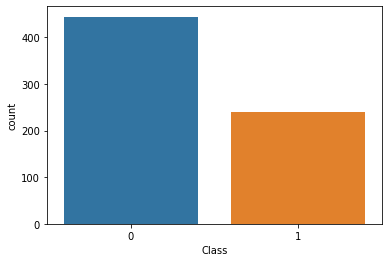

In [15]:
#For easier visual, plot a graph of the 'Class' values
sns.countplot(WBC['Class'])

## STEP 2: DATA ANALYSIS

A quick statistical analysis is carried out to determine the characteristics of the dataset. The relationships between variables and class are also tested.

In [16]:
# Describe the dataset.
WBC.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


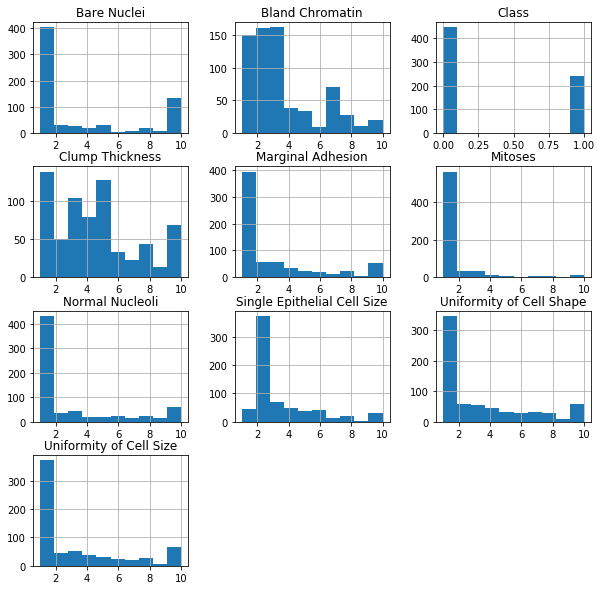

In [17]:
#Histogram visuals of all the variables of the dataset.
hist = WBC.hist(figsize = (10,10))

##### Looking into the boxplots of each variable to see how the values are spread out.
###### Input this into WEKA to get the class separated histogram as seen in the final report.

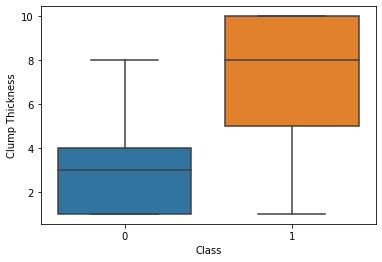

In [18]:
sns.boxplot(x ='Class', y = 'Clump Thickness', data = WBC)

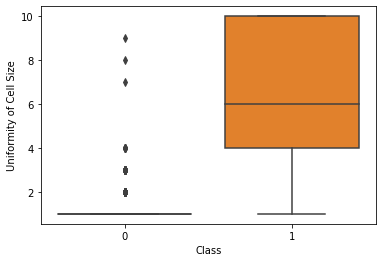

In [19]:
sns.boxplot(x ='Class', y = 'Uniformity of Cell Size', data = WBC)

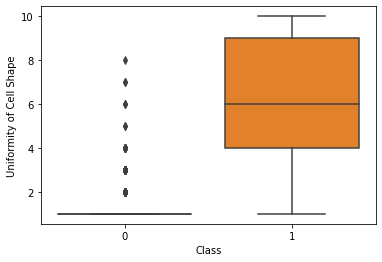

In [20]:
sns.boxplot(x ='Class', y = 'Uniformity of Cell Shape', data = WBC)

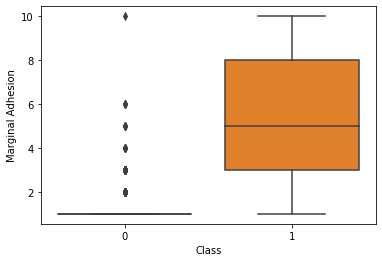

In [21]:
sns.boxplot(x ='Class', y = 'Marginal Adhesion', data = WBC)

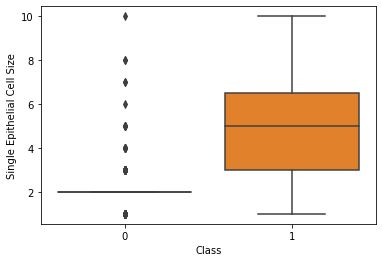

In [22]:
sns.boxplot(x ='Class', y = 'Single Epithelial Cell Size', data = WBC)

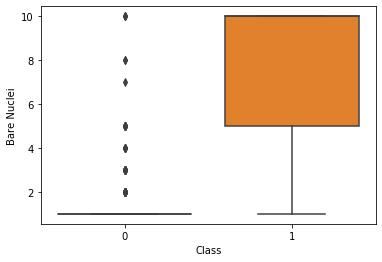

In [23]:
sns.boxplot(x ='Class', y = 'Bare Nuclei', data = WBC)

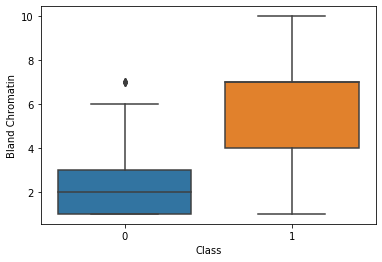

In [24]:
sns.boxplot(x ='Class', y = 'Bland Chromatin', data = WBC)

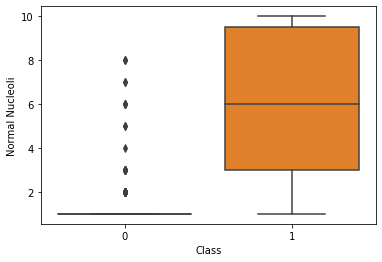

In [25]:
sns.boxplot(x ='Class', y = 'Normal Nucleoli', data = WBC)

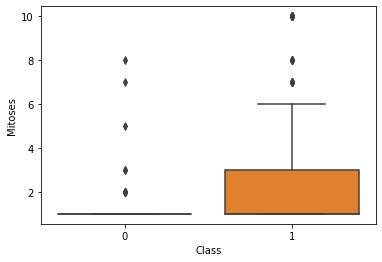

In [26]:
sns.boxplot(x ='Class', y = 'Mitoses', data = WBC)

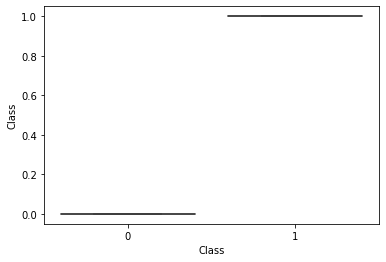

In [27]:
sns.boxplot(x ='Class', y = 'Class', data = WBC)

# Makes sense as the values are either 0 or 1

Looking at all the boxplots (except 'Class'), we can see that there are patterns between each variables on whether the cell are Benign or Malignant. To further test this, a pairplot and correlation is carried out determine which variable causes the most impact.

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


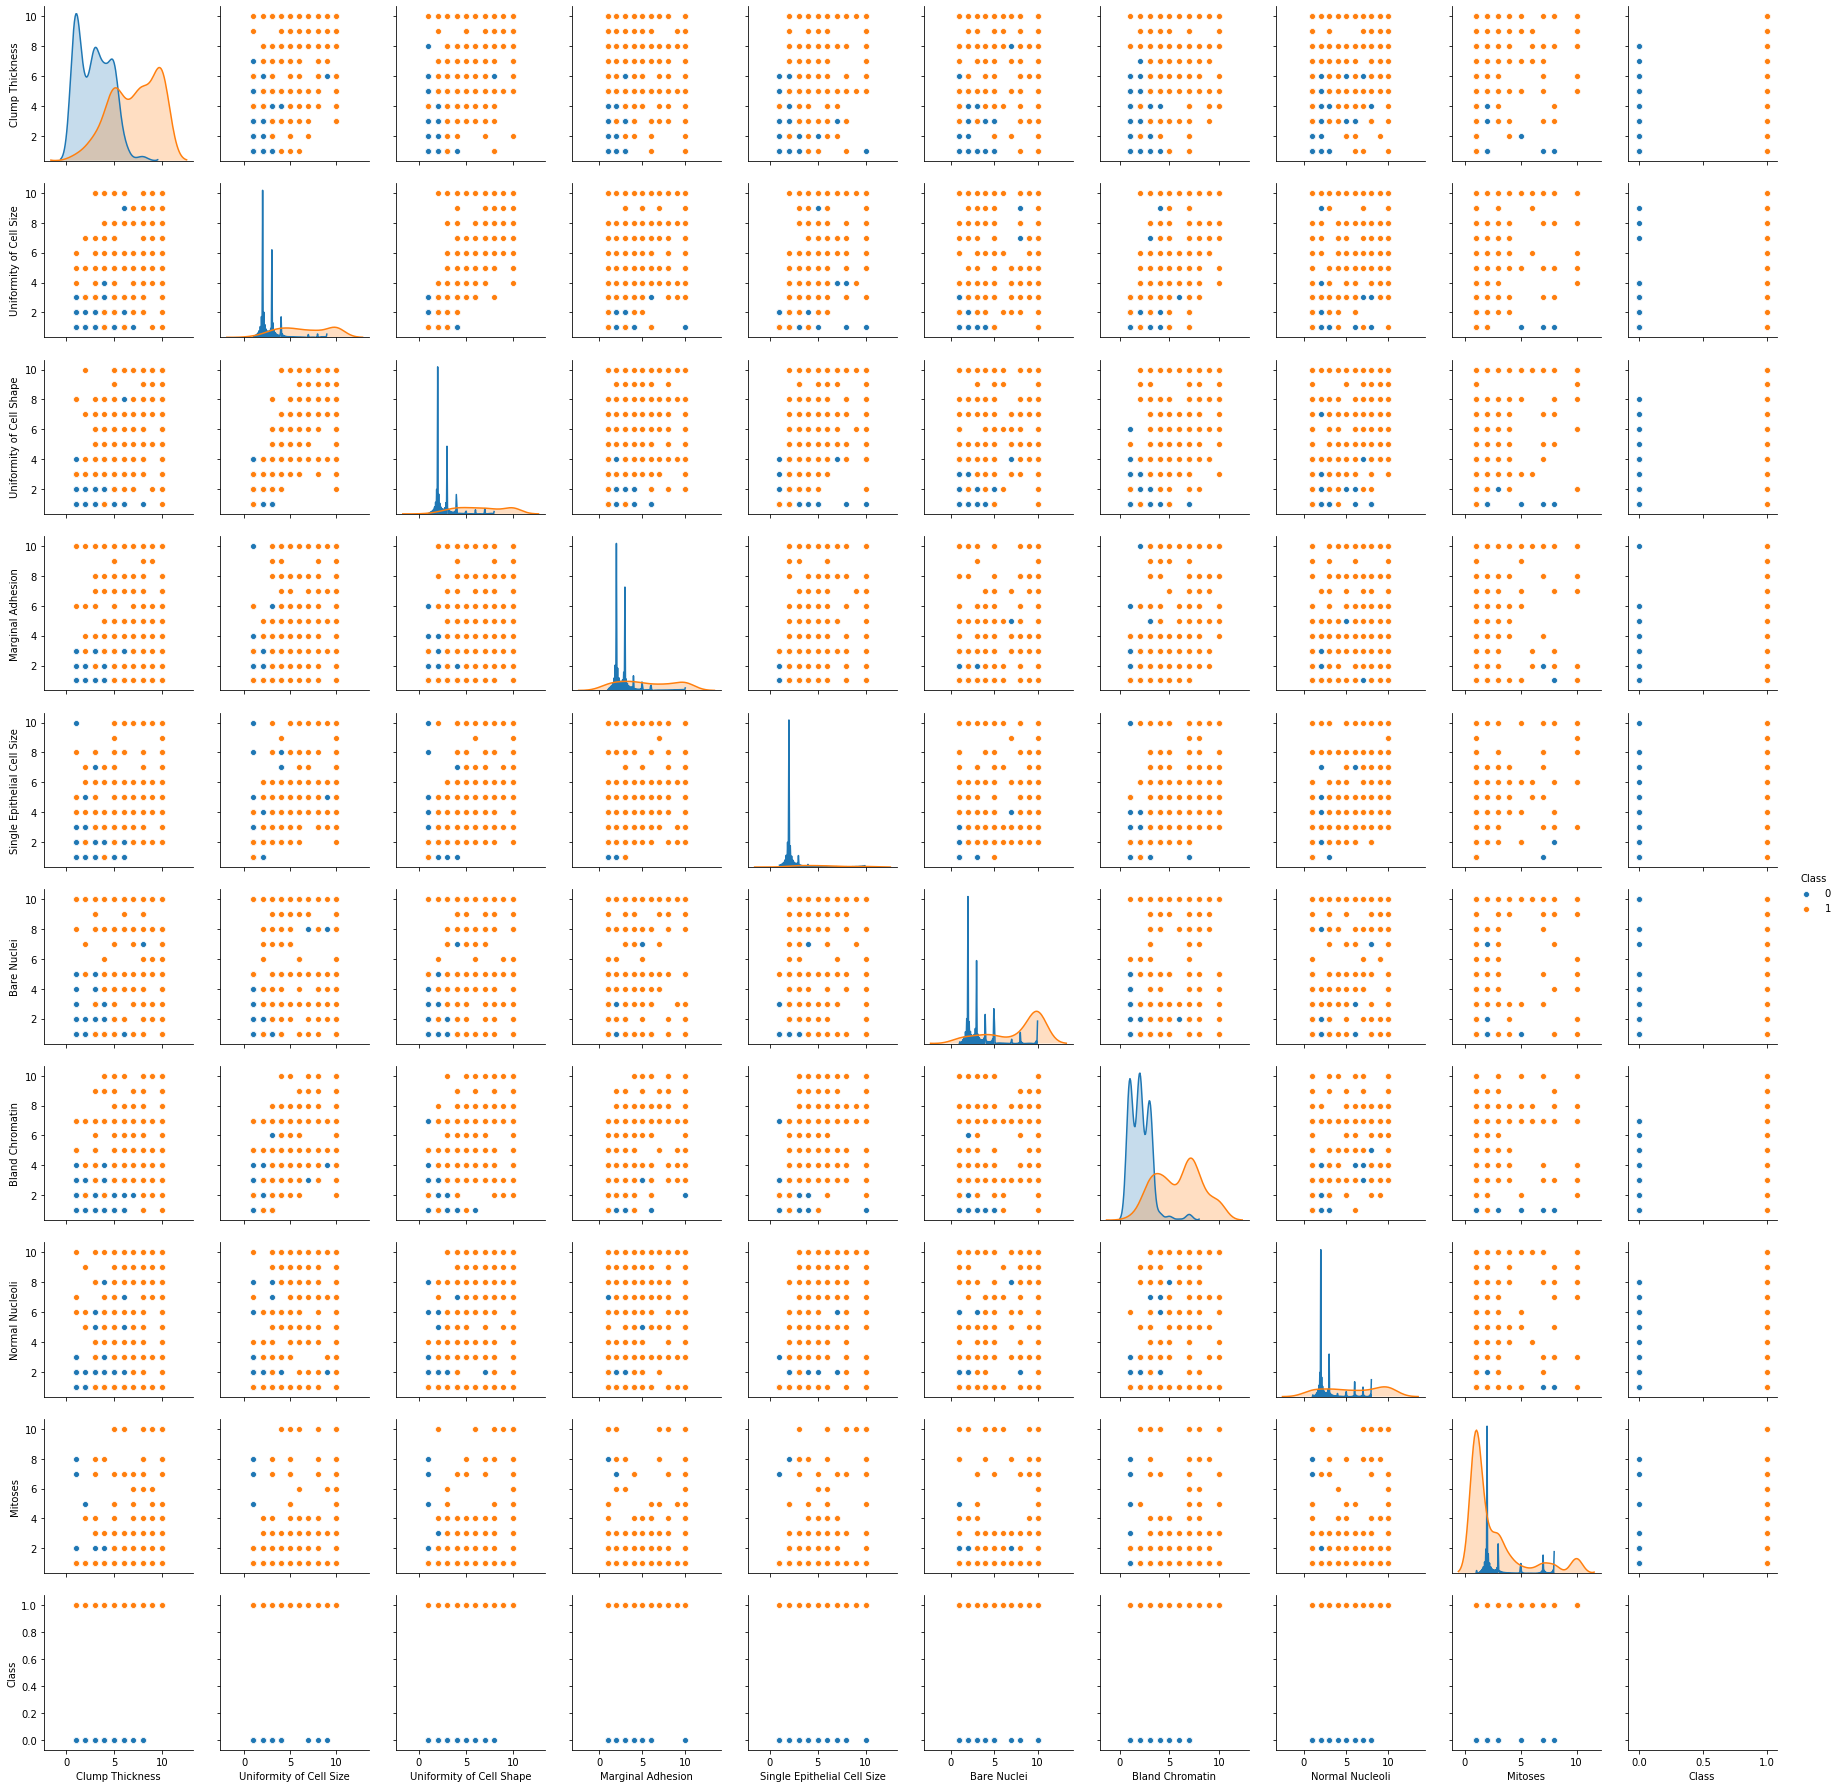

In [28]:
#To further visualize the dataset, a pairplot is done by separating the distinct 'Class' variable. 
sns.pairplot(WBC, hue="Class")
plt.show()

In [29]:
# It might be easier to determine correlations numerically. 

corr = WBC.corr()
corr.style.background_gradient(cmap='coolwarm')

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1,0.642481,0.65347,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.71479
Uniformity of Cell Size,0.642481,1,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.65347,0.907228,1,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1,0.680615,0.58428,0.33921,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.58428,0.665602,1,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.33921,0.346011,0.433757,1,0.423448
Class,0.71479,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1


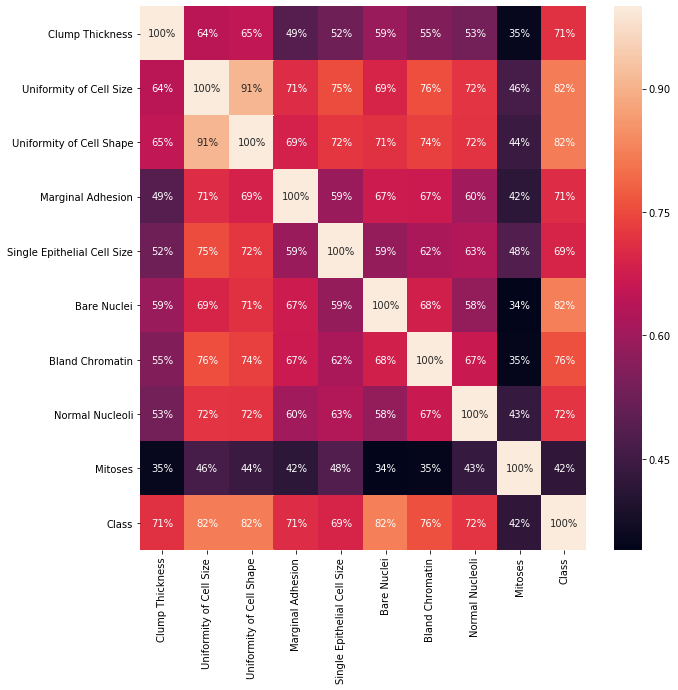

In [30]:
# To make it both visually pleasing and numerically understandable, a heatmap is created with the correlations in %
plt.figure(figsize = (10,10))
sns.heatmap(WBC.corr(), annot = True, fmt = '.0%')

##### Looking at the heatmaps, we can see the class correlation with other variables :-

    1) Bare Nuclei (82.23%)
    2) Uniformity of cell shape (82.19%)
    3) Uniformity of cell size (82.02%)
    4) Bland Chromatin (75.82%)
    5) Normal Nucleoli (71.87%)
    6) Clump Thickness (71.48%)
    7) Marginal Adhesion (70.63%)
    8) Single Epithelial Cell Size (69.10%)
    9) Mitoses (42.34%)

##### We can see there are strong correlations with the following order :-
    1) Uniformity of Cell Size and Uniformity of Cell Shape (91%)
    2) Bland Chromatin and Uniformity of Cell Size (76%)
    3) Uniformity of Cell Size and Single Epithelial Cell Size (75%)
---

## STEP 3: TRAIN AND TEST DATA

The data is split into 80% training set and 20% test set. 

In [31]:
#Separate dataset as response variable (independent variable) or feature variables.
X = WBC.drop('Class', axis = 1) #feature variable
y = WBC['Class']



In [32]:
#Train and Test data split using 80/20
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

In [33]:
#Count of how many rows are we testing on.
X_test.shape

(137, 9)

In [34]:
# Let look at the first 5 training data for the feature variables.
X_train.head (5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
452,3,1,1,3,2,1,1,1,1
264,7,9,4,10,10,3,5,3,3
599,5,2,4,1,1,1,1,1,1
18,10,7,7,6,4,10,4,1,2
364,2,1,1,1,2,1,3,1,1


We can see that the data is random (as we used random_state). 

#### Now that all the pre-processing is completed and the Train and Test set has been determined, the metric needed to evaluate the performance of the models is determined
---


## STEP 4: Metric Evaluations

Our goal is also to determine the model which will classify the least false negatives (Samples which are malignant but misclassified as benign). Therefore, the recall score is deemed as the main metric. Also, as the dataset is slightly imbalanced (65 % benign and 35% malaignant), accuracy is not deemed as the best evaluation metric.

However, accuracy will be used as a back up in the event there are similarities in the recall scores for the models.


In [35]:
# The following code is to gain a detailed result of the Accuracy, Precision, Recall and F1 Score. The focus is Recall
# but it is good to have a comprehensive insight on the overall performance. 
def model_report (y_actual, y_predicted):
    print ('Accuracy = ', accuracy_score(y_actual, y_predicted))
    print ('Precision = ', precision_score(y_actual, y_predicted))
    print ('Recall = ', recall_score(y_actual, y_predicted))
    print ('F1 Score = ', f1_score(y_actual, y_predicted))
    pass

Now that the metrics are in place, the variables will undergo Feature Importance or Feature Selection to rank them on how much they affect the classification of the cancer cells.

## STEP 5: Feature Importance 

KBestFeatures is used to determine the importance. Once the scores are detemined, a ranking table is made to visualize this,


In [36]:
#A new dataframe is created with the the features (in this case all variables were selected).
#The scores are then determine to order the feature importance.
f_select = SelectKBest(chi2, k = 9)
X_new = f_select.fit_transform(X, y)
names = X.columns.values[f_select.get_support()]
scores = f_select.scores_[f_select.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Features', 'Scores'])

In [37]:
#A table to visualize the features sorted by the importance is then created
ns_df_sorted = ns_df.sort_values(['Scores', 'Features'], ascending = [False, True])
print(ns_df_sorted)

                      Features       Scores
5                  Bare Nuclei  1729.066174
1      Uniformity of Cell Size  1370.064587
2     Uniformity of Cell Shape  1279.767704
7              Normal Nucleoli  1143.866712
3            Marginal Adhesion   986.417879
6              Bland Chromatin   682.978239
0              Clump Thickness   624.135704
4  Single Epithelial Cell Size   497.536763
8                      Mitoses   228.994346


Looking at the feature importance obtained, there are differences in the order of feature importance with our initial list of obtained using the correlation and heatmap earlier. We will process using the Select K Best method.

## STEP 6: Model Selection

#### Supervised binary classification approach will be implemented as we have labelled results of 0: Benign and 1: Malignant. 
#### The following models were selected as they work best with classified supervised data.
    1) Logistic Regresion
    2) Random Forest
    3) Naive Bayes
    4) Support Vector Machine (SVM)
    5) Decision Tree
    6) K-Nearest Neighbours (KNN)
    
The models are initailly carried out with all 9 features. Then, based on the feature importance, one by one, the least important feature is removed. The train and test is carried out again each time. 

## Logistic Regression

In [38]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)
pred_log_reg = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred_log_reg))

[[78  1]
 [ 6 52]]


/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# This will show what the machine predicted; whether it is Benign or Malignant
pred_log_reg[:20]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [40]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_log_reg))

[[78  1]
 [ 6 52]]


In [41]:
model_report(y_test, pred_log_reg)

Accuracy =  0.948905109489051
Precision =  0.9811320754716981
Recall =  0.896551724137931
F1 Score =  0.9369369369369369


In [42]:
# This label is carried out ease the table creation to visualize the metrics with other models.
# a = accuracy
# r = recall
# all = all variables included
log_reg_a_all = accuracy_score(y_test, pred_log_reg)
log_reg_r_all = recall_score(y_test, pred_log_reg)

## Random Forest Classifier

In [43]:
#The number of trees are set to 200 randomly
rfc = RandomForestClassifier(n_estimators = 200, random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [44]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_rfc))

[[78  1]
 [ 5 53]]


In [45]:
model_report(y_test, pred_rfc)

Accuracy =  0.9562043795620438
Precision =  0.9814814814814815
Recall =  0.9137931034482759
F1 Score =  0.9464285714285714


In [46]:
# This label is carried out ease the table creation to visualize the RF metrics with other models.
# a = accuracy
# r = recall
# all = all variables included
rf_a_all = accuracy_score(y_test, pred_rfc)
rf_r_all = recall_score(y_test, pred_rfc)

## Support Vector Machine Classifier

In [47]:
clf = svm.SVC(gamma='scale',random_state = 42)
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [48]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_clf))

[[77  2]
 [ 5 53]]


In [49]:
model_report(y_test, pred_clf)

Accuracy =  0.948905109489051
Precision =  0.9636363636363636
Recall =  0.9137931034482759
F1 Score =  0.9380530973451328


In [50]:
# This label is carried out ease the table creation to visualize the SVM metrics with other models.
# a = accuracy
# r = recall
# all = all variables included
svm_a_all = accuracy_score(y_test, pred_clf)
svm_r_all = recall_score(y_test, pred_clf)

## Naive Bayes

In [51]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

In [52]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_gnb))

[[76  3]
 [ 3 55]]


In [53]:
model_report(y_test, pred_gnb)

Accuracy =  0.9562043795620438
Precision =  0.9482758620689655
Recall =  0.9482758620689655
F1 Score =  0.9482758620689655


In [54]:
# This label is carried out ease the table creation to visualize the NB metrics with other models.
# a = accuracy
# r = recall
# all = all variables included
nb_a_all = accuracy_score(y_test, pred_gnb)
nb_r_all = recall_score(y_test, pred_gnb)

## Decision Tree

In [55]:
dt = tree.DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [56]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_dt))

[[77  2]
 [ 7 51]]


In [57]:
model_report(y_test, pred_dt)

Accuracy =  0.9343065693430657
Precision =  0.9622641509433962
Recall =  0.8793103448275862
F1 Score =  0.9189189189189189


In [58]:
# This label is carried out ease the table creation to visualize the DT metrics with other models.
# a = accuracy
# r = recall
# all = all variables included
dt_a_all = accuracy_score(y_test, pred_dt)
dt_r_all = recall_score(y_test, pred_dt)

[Text(591.48, 1026.8, 'X[1] <= 3.5\nentropy = 0.443\nsamples = 546\nvalue = [365, 181]'),
 Text(357.12, 906.0, 'X[5] <= 5.5\nentropy = 0.11\nsamples = 378\nvalue = [356, 22]'),
 Text(267.84000000000003, 785.2, 'X[7] <= 8.5\nentropy = 0.053\nsamples = 365\nvalue = [355, 10]'),
 Text(223.2, 664.4, 'X[5] <= 2.5\nentropy = 0.027\nsamples = 360\nvalue = [355, 5]'),
 Text(178.56, 543.6, 'entropy = 0.0\nsamples = 333\nvalue = [333, 0]'),
 Text(267.84000000000003, 543.6, 'X[0] <= 5.5\nentropy = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(223.2, 422.79999999999995, 'X[7] <= 2.5\nentropy = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(133.92000000000002, 302.0, 'X[4] <= 1.5\nentropy = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(89.28, 181.19999999999993, 'X[0] <= 2.5\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(44.64, 60.399999999999864, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 60.399999999999864, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17

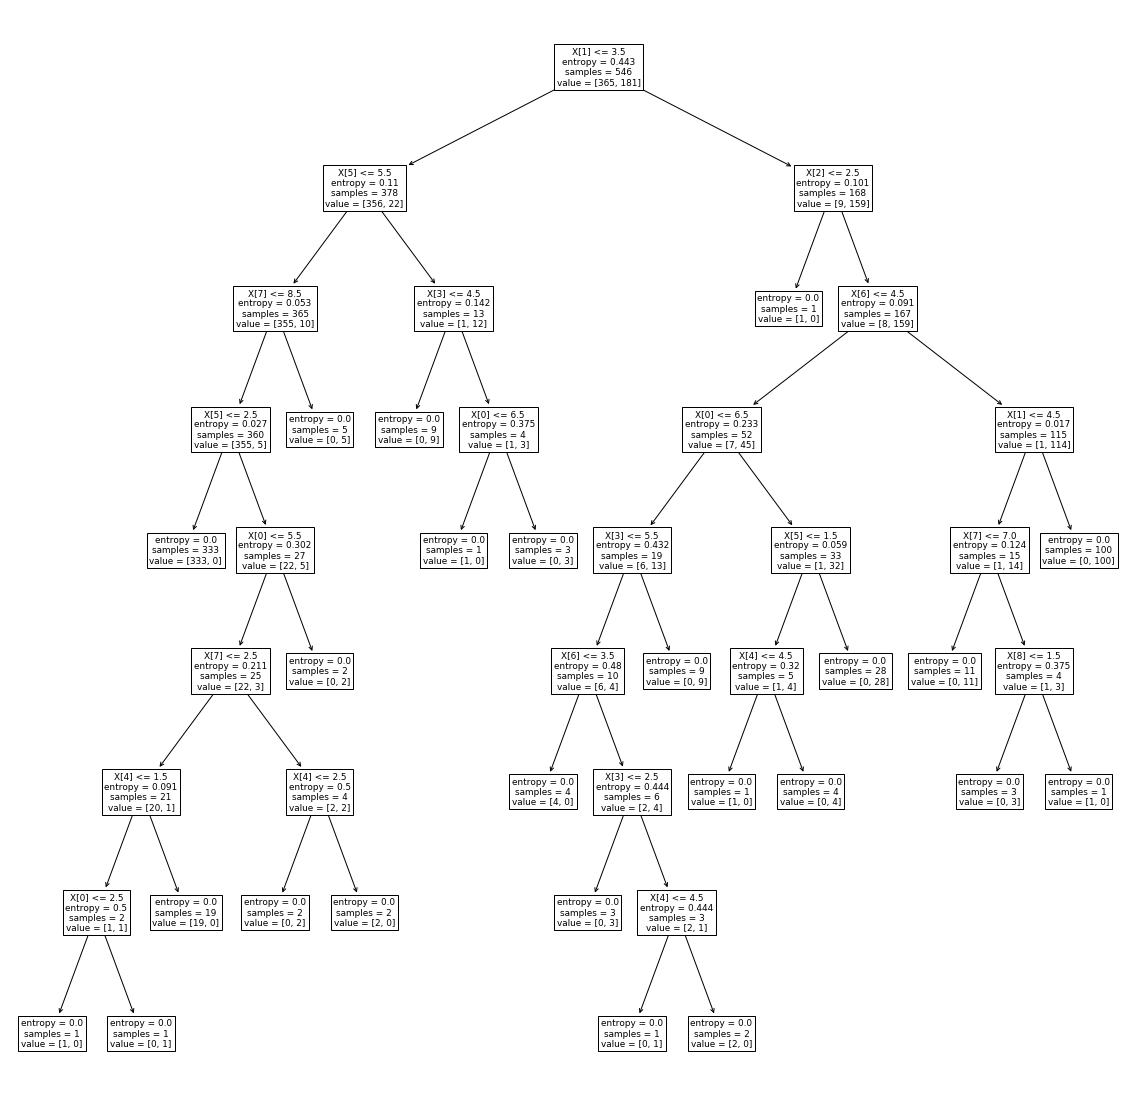

In [59]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dt.fit(X_train, y_train))

## KNN

In [60]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
pred_neigh = neigh.predict(X_test)

In [61]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_neigh))

[[78  1]
 [ 6 52]]


In [62]:
model_report(y_test, pred_neigh)

Accuracy =  0.948905109489051
Precision =  0.9811320754716981
Recall =  0.896551724137931
F1 Score =  0.9369369369369369


In [63]:
# This label is carried out ease the table creation to visualize the KNN metrics with other models.
# a = accuracy
# r = recall
# all = all variables included
knn_a_all = accuracy_score(y_test, pred_neigh)
knn_r_all = recall_score(y_test, pred_neigh)

# Models with Feature Selections

### From here on, we will be testing all models by Backward Elimination which is the removal of the lowest importance features.

#### Based on the rankings obtained, the features will be removed in the following order:-
    1) Mitoses
    2) Single Epithelial Cell Size
    3) Clump Thickness
    4) Bland Chromatin
    5) Marginal Adhesion
    6) Normal Nucleoli
    7) Uniformity of Cell Shape
    8) Uniformity of Cell Size
    
#### The final step will only have Bare Nuclei (the calculated most important feature) to determine the cancer type.

In [64]:
# Start removing the features in order of lowest importance (Mitoses) to highest (Uniformity of Cell Size).
# The final dataframe will only have Bare Nuclei.
#The y remains the same as it is the Class variable.

X_1 = X.drop('Mitoses', axis = 1) #feature variable
X_2 = X_1.drop('Single Epithelial Cell Size', axis = 1)
X_3 = X_2.drop('Clump Thickness', axis = 1)
X_4 = X_3.drop('Bland Chromatin', axis = 1)
X_5 = X_4.drop('Marginal Adhesion', axis = 1)
X_6 = X_5.drop('Normal Nucleoli', axis = 1)
X_7 = X_6.drop('Uniformity of Cell Shape', axis = 1)
X_8 = X_7.drop('Uniformity of Cell Size', axis = 1)


In [65]:
#Retrain all the datasets with the Train and Test data split with 80/20 
X_train_1, X_test_1, y_train, y_test = train_test_split (X_1,y, test_size = 0.2, random_state = 42)
X_train_2, X_test_2, y_train, y_test = train_test_split (X_2,y, test_size = 0.2, random_state = 42)
X_train_3, X_test_3, y_train, y_test = train_test_split (X_3,y, test_size = 0.2, random_state = 42)
X_train_4, X_test_4, y_train, y_test = train_test_split (X_4,y, test_size = 0.2, random_state = 42)
X_train_5, X_test_5, y_train, y_test = train_test_split (X_5,y, test_size = 0.2, random_state = 42)
X_train_6, X_test_6, y_train, y_test = train_test_split (X_6,y, test_size = 0.2, random_state = 42)
X_train_7, X_test_7, y_train, y_test = train_test_split (X_7,y, test_size = 0.2, random_state = 42)
X_train_8, X_test_8, y_train, y_test = train_test_split (X_8,y, test_size = 0.2, random_state = 42)

In [66]:
#Confirm that there is only one variable (Bare Nuclei) at the end.
X_test_8.shape

(137, 1)

## Logistic Regression with Backward Elimination
#### We will repeat the entire step to see check on the performance of the model as we remove the variables.

In [67]:
log_reg.fit(X_train_1, y_train)
pred_log_reg_1 = log_reg.predict(X_test_1)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_log_reg_1))

[[78  1]
 [ 7 51]]


In [69]:
# Model test. How well did it performed?
print(model_report(y_test, pred_log_reg_1))

Accuracy =  0.9416058394160584
Precision =  0.9807692307692307
Recall =  0.8793103448275862
F1 Score =  0.9272727272727272
None


In [70]:
# This label is carried out ease the table creation to visualize the metrics with other models.
# a = accuracy
# r = recall
# m1 = minus 1 variable (Mitoses)
log_reg_a_m1 = accuracy_score(y_test, pred_log_reg_1)
log_reg_r_m1 = recall_score(y_test, pred_log_reg_1)

In [71]:
#Repeat the steps with all the new dataset from X_2 till X_8.
log_reg.fit(X_train_2, y_train)
pred_log_reg_2 = log_reg.predict(X_test_2)
log_reg_a_m2 = accuracy_score(y_test, pred_log_reg_2)
log_reg_r_m2 = recall_score(y_test, pred_log_reg_2)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
log_reg.fit(X_train_3, y_train)
pred_log_reg_3 = log_reg.predict(X_test_3)
log_reg_a_m3 = accuracy_score(y_test, pred_log_reg_3)
log_reg_r_m3 = recall_score(y_test, pred_log_reg_3)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
log_reg.fit(X_train_4, y_train)
pred_log_reg_4 = log_reg.predict(X_test_4)
log_reg_a_m4 = accuracy_score(y_test, pred_log_reg_4)
log_reg_r_m4 = recall_score(y_test, pred_log_reg_4)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
log_reg.fit(X_train_5, y_train)
pred_log_reg_5 = log_reg.predict(X_test_5)
log_reg_a_m5 = accuracy_score(y_test, pred_log_reg_5)
log_reg_r_m5 = recall_score(y_test, pred_log_reg_5)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
log_reg.fit(X_train_6, y_train)
pred_log_reg_6 = log_reg.predict(X_test_6)
log_reg_a_m6 = accuracy_score(y_test, pred_log_reg_6)
log_reg_r_m6 = recall_score(y_test, pred_log_reg_6)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
log_reg.fit(X_train_7, y_train)
pred_log_reg_7 = log_reg.predict(X_test_7)
log_reg_a_m7 = accuracy_score(y_test, pred_log_reg_7)
log_reg_r_m7 = recall_score(y_test, pred_log_reg_7)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
log_reg.fit(X_train_8, y_train)
pred_log_reg_8 = log_reg.predict(X_test_8)
log_reg_a_m8 = accuracy_score(y_test, pred_log_reg_8)
log_reg_r_m8 = recall_score(y_test, pred_log_reg_8)

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest with Backward Elimination


In [78]:
#The number of trees are set to 200 randomly
#rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train_1, y_train)
pred_rfc_1 = rfc.predict(X_test_1)

In [79]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_rfc_1))

[[78  1]
 [ 4 54]]


In [80]:
# Model test. How well did it performed?
print(model_report(y_test, pred_rfc_1))

Accuracy =  0.9635036496350365
Precision =  0.9818181818181818
Recall =  0.9310344827586207
F1 Score =  0.9557522123893805
None


In [81]:
# This label is carried out ease the table creation to visualize the KNN metrics with other models.
# a = accuracy
# r = recall
# m1 = minus 1 variable (Mitoses)
rf_a_m1 = accuracy_score(y_test, pred_rfc_1)
rf_r_m1 = recall_score(y_test, pred_rfc_1)

In [82]:
#Repeat the steps with all the new dataset from X_2 till X_8. We will focus solely on the accuracy score from here.
rfc.fit(X_train_2, y_train)
pred_rfc_2 = rfc.predict(X_test_2)
rf_a_m2 = accuracy_score(y_test, pred_rfc_2)
rf_r_m2 = recall_score(y_test, pred_rfc_2)


In [83]:
rfc.fit(X_train_3, y_train)
pred_rfc_3 = rfc.predict(X_test_3)
rf_a_m3 = accuracy_score(y_test, pred_rfc_3)
rf_r_m3 = recall_score(y_test, pred_rfc_3)

In [84]:
rfc.fit(X_train_4, y_train)
pred_rfc_4 = rfc.predict(X_test_4)
rf_a_m4 = accuracy_score(y_test, pred_rfc_4)
rf_r_m4 = recall_score(y_test, pred_rfc_4)

In [85]:
rfc.fit(X_train_5, y_train)
pred_rfc_5 = rfc.predict(X_test_5)
rf_a_m5 = accuracy_score(y_test, pred_rfc_5)
rf_r_m5 = recall_score(y_test, pred_rfc_5)

In [86]:
rfc.fit(X_train_6, y_train)
pred_rfc_6 = rfc.predict(X_test_6)
rf_a_m6 = accuracy_score(y_test, pred_rfc_6)
rf_r_m6 = recall_score(y_test, pred_rfc_6)

In [87]:
rfc.fit(X_train_7, y_train)
pred_rfc_7 = rfc.predict(X_test_7)
rf_a_m7 = accuracy_score(y_test, pred_rfc_7)
rf_r_m7 = recall_score(y_test, pred_rfc_7)

In [88]:
rfc.fit(X_train_8, y_train)
pred_rfc_8 = rfc.predict(X_test_8)
rf_a_m8 = accuracy_score(y_test, pred_rfc_8)
rf_r_m8 = recall_score(y_test, pred_rfc_8)

## SVM with Backward Elimination

In [89]:
clf.fit(X_train_1,y_train)
pred_clf_1 = clf.predict(X_test_1)
svm_a_m1 = accuracy_score(y_test, pred_clf_1)
svm_r_m1 = recall_score(y_test, pred_clf_1)

In [90]:
clf.fit(X_train_2,y_train)
pred_clf_2 = clf.predict(X_test_2)
svm_a_m2 = accuracy_score(y_test, pred_clf_2)
svm_r_m2 = recall_score(y_test, pred_clf_2)

In [91]:
clf.fit(X_train_3,y_train)
pred_clf_3 = clf.predict(X_test_3)
svm_a_m3 = accuracy_score(y_test, pred_clf_3)
svm_r_m3 = recall_score(y_test, pred_clf_3)

In [92]:
clf.fit(X_train_4,y_train)
pred_clf_4 = clf.predict(X_test_4)
svm_a_m4 = accuracy_score(y_test, pred_clf_4)
svm_r_m4 = recall_score(y_test, pred_clf_4)

In [93]:
clf.fit(X_train_5,y_train)
pred_clf_5 = clf.predict(X_test_5)
svm_a_m5 = accuracy_score(y_test, pred_clf_5)
svm_r_m5 = recall_score(y_test, pred_clf_5)

In [94]:
clf.fit(X_train_6,y_train)
pred_clf_6 = clf.predict(X_test_6)
svm_a_m6 = accuracy_score(y_test, pred_clf_6)
svm_r_m6 = recall_score(y_test, pred_clf_6)

In [95]:
clf.fit(X_train_7,y_train)
pred_clf_7 = clf.predict(X_test_7)
svm_a_m7 = accuracy_score(y_test, pred_clf_7)
svm_r_m7 = recall_score(y_test, pred_clf_7)

In [96]:
clf.fit(X_train_8,y_train)
pred_clf_8 = clf.predict(X_test_8)
svm_a_m8 = accuracy_score(y_test, pred_clf_8)
svm_r_m8 = recall_score(y_test, pred_clf_8)

## Naive Bayes with Backward Elimination

In [97]:
#gnb = GaussianNB()
gnb.fit(X_train_1, y_train)
pred_gnb_1 = gnb.predict(X_test_1)
nb_a_m1 = accuracy_score(y_test, pred_gnb_1)
nb_r_m1 = recall_score(y_test, pred_gnb_1)

In [98]:
gnb.fit(X_train_2, y_train)
pred_gnb_2 = gnb.predict(X_test_2)
nb_a_m2 = accuracy_score(y_test, pred_gnb_2)
nb_r_m2 = recall_score(y_test, pred_gnb_2)

In [99]:
gnb.fit(X_train_3, y_train)
pred_gnb_3 = gnb.predict(X_test_3)
nb_a_m3 = accuracy_score(y_test, pred_gnb_3)
nb_r_m3 = recall_score(y_test, pred_gnb_3)

In [100]:
gnb.fit(X_train_4, y_train)
pred_gnb_4 = gnb.predict(X_test_4)
nb_a_m4 = accuracy_score(y_test, pred_gnb_4)
nb_r_m4 = recall_score(y_test, pred_gnb_4)

In [101]:
gnb.fit(X_train_5, y_train)
pred_gnb_5 = gnb.predict(X_test_5)
nb_a_m5 = accuracy_score(y_test, pred_gnb_5)
nb_r_m5 = recall_score(y_test, pred_gnb_5)

In [102]:
gnb.fit(X_train_6, y_train)
pred_gnb_6 = gnb.predict(X_test_6)
nb_a_m6 = accuracy_score(y_test, pred_gnb_6)
nb_r_m6 = recall_score(y_test, pred_gnb_6)

In [103]:
gnb.fit(X_train_7, y_train)
pred_gnb_7 = gnb.predict(X_test_7)
nb_a_m7 = accuracy_score(y_test, pred_gnb_7)
nb_r_m7 = recall_score(y_test, pred_gnb_7)

In [104]:
gnb.fit(X_train_8, y_train)
pred_gnb_8 = gnb.predict(X_test_8)
nb_a_m8 = accuracy_score(y_test, pred_gnb_8)
nb_r_m8 = recall_score(y_test, pred_gnb_8)

## Decision Tree with Backward Elimination

In [105]:
#tre = tree.DecisionTreeClassifier()
dt.fit(X_train_1, y_train)
pred_dt_1 = dt.predict(X_test_1)
dt_a_m1 = accuracy_score(y_test, pred_dt_1)
dt_r_m1 = recall_score(y_test, pred_dt_1)

In [106]:
dt.fit(X_train_2, y_train)
pred_dt_2 = dt.predict(X_test_2)
dt_a_m2 = accuracy_score(y_test, pred_dt_2)
dt_r_m2 = recall_score(y_test, pred_dt_2)

In [107]:
dt.fit(X_train_3, y_train)
pred_dt_3 = dt.predict(X_test_3)
dt_a_m3 = accuracy_score(y_test, pred_dt_3)
dt_r_m3 = recall_score(y_test, pred_dt_3)

In [108]:
dt.fit(X_train_4, y_train)
pred_dt_4 = dt.predict(X_test_4)
dt_a_m4 = accuracy_score(y_test, pred_dt_4)
dt_r_m4 = recall_score(y_test, pred_dt_4)

In [109]:
dt.fit(X_train_5, y_train)
pred_dt_5 = dt.predict(X_test_5)
dt_a_m5 = accuracy_score(y_test, pred_dt_5)
dt_r_m5 = recall_score(y_test, pred_dt_5)

In [110]:
dt.fit(X_train_6, y_train)
pred_dt_6 = dt.predict(X_test_6)
dt_a_m6 = accuracy_score(y_test, pred_dt_6)
dt_r_m6 = recall_score(y_test, pred_dt_6)

In [111]:
dt.fit(X_train_7, y_train)
pred_dt_7 = dt.predict(X_test_7)
dt_a_m7 = accuracy_score(y_test, pred_dt_7)
dt_r_m7 = recall_score(y_test, pred_dt_7)

In [112]:
dt.fit(X_train_8, y_train)
pred_dt_8 = dt.predict(X_test_8)
dt_a_m8 = accuracy_score(y_test, pred_dt_8)
dt_r_m8 = recall_score(y_test, pred_dt_8)

## KNN with Backward Elimination

In [113]:
#neigh = KNeighborsClassifier()
neigh.fit(X_train_1, y_train)
pred_neigh_1 = neigh.predict(X_test_1)
knn_a_m1 = accuracy_score(y_test, pred_neigh_1)
knn_r_m1 = recall_score(y_test, pred_neigh_1)

In [114]:
neigh.fit(X_train_2, y_train)
pred_neigh_2 = neigh.predict(X_test_2)
knn_a_m2 = accuracy_score(y_test, pred_neigh_2)
knn_r_m2 = recall_score(y_test, pred_neigh_2)

In [115]:
neigh.fit(X_train_3, y_train)
pred_neigh_3 = neigh.predict(X_test_3)
knn_a_m3 = accuracy_score(y_test, pred_neigh_3)
knn_r_m3 = recall_score(y_test, pred_neigh_3)

In [116]:
neigh.fit(X_train_4, y_train)
pred_neigh_4 = neigh.predict(X_test_4)
knn_a_m4 = accuracy_score(y_test, pred_neigh_4)
knn_r_m4 = recall_score(y_test, pred_neigh_4)

In [117]:
neigh.fit(X_train_5, y_train)
pred_neigh_5 = neigh.predict(X_test_5)
knn_a_m5 = accuracy_score(y_test, pred_neigh_5)
knn_r_m5 = recall_score(y_test, pred_neigh_5)

In [118]:
neigh.fit(X_train_6, y_train)
pred_neigh_6 = neigh.predict(X_test_6)
knn_a_m6 = accuracy_score(y_test, pred_neigh_6)
knn_r_m6 = recall_score(y_test, pred_neigh_6)

In [119]:
neigh.fit(X_train_7, y_train)
pred_neigh_7 = neigh.predict(X_test_7)
knn_a_m7 = accuracy_score(y_test, pred_neigh_7)
knn_r_m7 = recall_score(y_test, pred_neigh_7)

In [120]:
neigh.fit(X_train_8, y_train)
pred_neigh_8 = neigh.predict(X_test_8)
knn_a_m8 = accuracy_score(y_test, pred_neigh_8)
knn_r_m8 = recall_score(y_test, pred_neigh_8)

## Now we will compare all the values and plots a graph to visualize the accuracy and recall of the models with varying variables.

    



### Recall Results

In [121]:
#The table to compare recall scores across models
Comparison_Table_Recall_Collective = { 
    'Variables': ['All Features','Features -1','Features -2','Features -3', 'Features -4','Features -5','Features -6','Features -7', 'Features -8'],
    'Logistic Regression': [log_reg_r_all,log_reg_r_m1,log_reg_r_m2,log_reg_r_m3,log_reg_r_m4,log_reg_r_m5,log_reg_r_m6,log_reg_r_m7,log_reg_r_m8],
    'Random Forest': [rf_r_all,rf_r_m1,rf_r_m2,rf_r_m3,rf_r_m4,rf_r_m5,rf_r_m6,rf_r_m7,rf_r_m8],
    'SVM': [svm_r_all,svm_r_m1,svm_r_m2,svm_r_m3,svm_r_m4,svm_r_m5,svm_r_m6,svm_r_m7,svm_r_m8],
    'Naive Bayes': [nb_r_all,nb_r_m1,nb_r_m2,nb_r_m3,nb_r_m4,nb_r_m5,nb_r_m6,nb_r_m7,nb_r_m8],
    'Decision Tree':[dt_r_all,dt_r_m1,dt_r_m2,dt_r_m3,dt_r_m4,dt_r_m5,dt_r_m6,dt_r_m7,dt_r_m8],
    'KNN':[knn_r_all,knn_r_m1,knn_r_m2,knn_r_m3,knn_r_m4,knn_r_m5,knn_r_m6,knn_r_m7,knn_r_m8]
}
Comparison_Table_Recall = pd.DataFrame(Comparison_Table_Recall_Collective)  

# This will highlight the largest value for each model. pink is selected as symbolism for breast cancer awareness

def highlight_max(r):
    is_max = r == r.max()
    return ['background-color: pink' if v else '' for v in is_max]

Comparison_Table_Recall.style.apply(highlight_max,subset=pd.IndexSlice[:, ['Logistic Regression','Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree','KNN']])


,Variables,Logistic Regression,Random Forest,SVM,Naive Bayes,Decision Tree,KNN
0,All Features,0.896552,0.913793,0.913793,0.948276,0.87931,0.896552
1,Features -1,0.87931,0.931034,0.931034,0.965517,0.862069,0.913793
2,Features -2,0.87931,0.931034,0.931034,0.965517,0.896552,0.896552
3,Features -3,0.844828,0.896552,0.87931,0.931034,0.87931,0.896552
4,Features -4,0.844828,0.896552,0.87931,0.913793,0.87931,0.896552
5,Features -5,0.862069,0.896552,0.87931,0.913793,0.87931,0.913793
6,Features -6,0.844828,0.913793,0.87931,0.896552,0.810345,0.896552
7,Features -7,0.862069,0.913793,0.87931,0.87931,0.896552,0.913793
8,Features -8,0.724138,0.810345,0.810345,0.810345,0.810345,0.706897


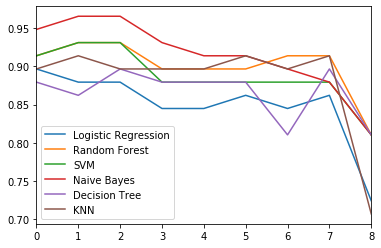

In [122]:
#Below is the visual for the recall trends
Comparison_Table_Recall.plot()

### Accuracy Results

In [123]:
#The table to compare accuracy scores across models
Comparison_Table_Accuracy_Collective = { 
    'Variables': ['All Features','Features -1','Features -2','Features -3', 'Features -4','Features -5','Features -6','Features -7', 'Features -8'],
    'Logistic Regression': [log_reg_a_all,log_reg_a_m1,log_reg_a_m2,log_reg_a_m3,log_reg_a_m4,log_reg_a_m5,log_reg_a_m6,log_reg_a_m7,log_reg_a_m8],
    'Random Forest': [rf_a_all,rf_a_m1,rf_a_m2,rf_a_m3,rf_a_m4,rf_a_m5,rf_a_m6,rf_a_m7,rf_a_m8],
    'SVM': [svm_a_all,svm_a_m1,svm_a_m2,svm_a_m3,svm_a_m4,svm_a_m5,svm_a_m6,svm_a_m7,svm_a_m8],
    'Naive Bayes': [nb_a_all,nb_a_m1,nb_a_m2,nb_a_m3,nb_a_m4,nb_a_m5,nb_a_m6,nb_a_m7,nb_a_m8],
    'Decision Tree':[dt_a_all,dt_a_m1,dt_a_m2,dt_a_m3,dt_a_m4,dt_a_m5,dt_a_m6,dt_a_m7,dt_a_m8],
    'KNN':[knn_a_all,knn_a_m1,knn_a_m2,knn_a_m3,knn_a_m4,knn_a_m5,knn_a_m6,knn_a_m7,knn_a_m8]
}
Comparison_Table_Accuracy = pd.DataFrame(Comparison_Table_Accuracy_Collective)  

#Highlight the best accuracy for each model.

def highlight_max(a):
    is_max = a == a.max()
    return ['background-color: pink' if v else '' for v in is_max]

Comparison_Table_Accuracy.style.apply(highlight_max,subset=pd.IndexSlice[:, ['Logistic Regression','Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree','KNN']])

,Variables,Logistic Regression,Random Forest,SVM,Naive Bayes,Decision Tree,KNN
0,All Features,0.948905,0.956204,0.948905,0.956204,0.934307,0.948905
1,Features -1,0.941606,0.963504,0.956204,0.970803,0.927007,0.956204
2,Features -2,0.941606,0.963504,0.956204,0.963504,0.941606,0.948905
3,Features -3,0.927007,0.934307,0.934307,0.948905,0.934307,0.941606
4,Features -4,0.927007,0.934307,0.934307,0.948905,0.941606,0.941606
5,Features -5,0.927007,0.934307,0.934307,0.941606,0.934307,0.948905
6,Features -6,0.919708,0.941606,0.927007,0.934307,0.905109,0.934307
7,Features -7,0.927007,0.948905,0.927007,0.927007,0.948905,0.941606
8,Features -8,0.868613,0.89781,0.89781,0.89781,0.89781,0.824818


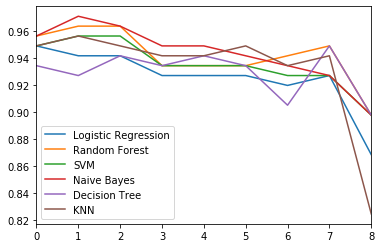

In [124]:
#Below is the visual for the accuracy trends
Comparison_Table_Accuracy.plot()

## CONCLUSION

The goal of the project is to determine the best performing model with backward elimination to determine relevant variables in the diagnosis of benign and malignant cancer. Based on the results attained, Naive Bayes produced the least false negatives as determined by the recall score (96.6%) and the highest accurate score diagnosis at 97.1% with the removal of a single variable.



## REFERENCES

“Breast Cancer Statistics.” The Canadian Cancer Society., 2019, www.cancer.ca/en/cancer-information/cancer-type/breast/statistics/?region=on.

“Cancer and COVID19 (Novel Coronavirus).” The Canadian Cancer Society, 11 Mar. 2020, www.cancer.ca/en/support-and-services/support-services/cancer-and-covid19/?region=on.

“Cancer Facts & Figures 2020.” The American Cancer Society, 2020, www.cancer.org/content/dam/cancer-org/research/cancer-facts-and-statistics/annual-cancer-facts-and-figures/2020/cancer-facts-and-figures-2020.pdf.

Casaubon, J. T., and J. P. Regan. “Fine Needle Aspiration Of Breast Masses.” StatPearls [Internet], 2020, pp. 1–7. StatPearls Publishing LLC., https://www.ncbi.nlm.nih.gov/books/NBK470268/#_NBK470268_pubdet_.

“Core Needle Biopsy of the Breast.” The American Cancer Society, 2017, www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/core-needle-biopsy-of-the-breast.html/.

“Fine Needle Aspiration (FNA) Biopsy of the Breast.” The American Cancer Society, 2017, www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html.

Garbar, C, and H Curé. “Fine-Needle Aspiration Cytology Can Play a Role in Neoadjuvant Chemotherapy in Operable Breast Cancer.” ISRN Oncology, 2013, 10 July 2013, pp. 1–5. Hindawi Publishing Corporation, doi:10.1155/2013/935796.

Grant, K. “Ontario Hospitals Warn COVID-19 Trumps Cancer Care in Event of Outbreak.” The Globe and Mail, 17 Mar. 2020, www.theglobeandmail.com/canada/article-ontario-hospitals-warn-covid-19-trumps-cancer-care-in-event-of/.

Karâa, W., and N. Dey. Biomedical Image Analysis and Mining Techniques for Improved Health Outcomes. IGI Global, 2015, pp. 214.

Kourou, K., et al. “Machine Learning Applications in Cancer Prognosis and Prediction.” Computational and Structural Biotechnology, vol. 13, 2015, pp. 8–17. Science Direct, https://doi.org/10.1016/j.csbj.2014.11.005.

Ming, C., et al. “Machine Learning Techniques for Personalized Breast Cancer Risk Prediction: Comparison with the BCRAT and BOADICEA Models.” Breast Cancer Research, vol. 21, no. 75, 2019, pp. 1–11. BMC - Springer Nature, https://doi.org/10.1186/s13058-019-1158-4.

Sharma, S., et al. “Breast Cancer Detection Using Machine Learning Algorithms.” International Conference on Computational Techniques, Electronics and Mechanical Systems (CTEMS), 2018, pp. 114–118. IEEE Xplore, doi:10.1109/CTEMS.2018.8769187.

University of Wisconsin Hospitals. “Breast Cancer Wisconsin (Original) Data Set.” UC Irvine Machine Learning Repository, 1992, archive.ics.uci.edu/ml/datasets/Breast Cancer Wisconsin (Original).

